In [1]:
from plywood_gallery import ChapterManager
#ChapterManager.clean("Image Options")
ChapterManager.reset_counter()
ChapterManager.set_chapter_name("Morpho")

2022-01-17 17:51:58.706 Python[36297:267220] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/org.python.python.savedState


NapariSettings (defaults excluded)
----------------------------------
appearance:
  theme: light
application:
  first_time: false
  save_window_geometry: false
  window_position:
  - 800
  - 300
  window_statusbar: false

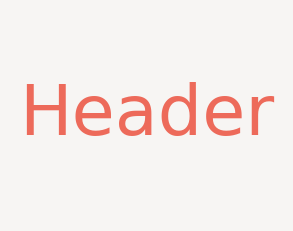

In [2]:
%%capture_png -p Header2.png --celltype Header --style "width:140px"
import matplotlib.pyplot as plt
import napari
import numpy as np
import scipy
from scipy import ndimage as ndi
from skimage import data

from napari.settings import get_settings

get_settings().application.window_position = (800,300)
get_settings().application.window_fullscreen = False
get_settings().application.window_statusbar =  False
get_settings().application.save_window_state =  False

try:
    viewer
except NameError:
    viewer = napari.Viewer()
    viewer.theme = "light"
    viewer.dims.ndisplay = 3
    viewer.window.resize(800, 600) 
    viewer.window.qt_viewer.dockLayerControls.toggleViewAction().trigger()
    viewer.window.qt_viewer.dockLayerList.toggleViewAction().trigger()


def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash= False)
    plt.imshow(img)
    plt.axis("off")

# make data
blobs = data.binary_blobs(length=301, volume_fraction=0.1, n_dim=3, seed=42)
blobs  = blobs[200:,200:, :-100]
blobs[:,:,:50]=1


import matplotlib.pyplot as plt
import numpy as np
import scipy
from skimage.morphology import ball, cube, octahedron

def plot_voxels(varray, ax= None, title= None, linewidth=0.8):
    cmap = plt.get_cmap("YlGnBu")

    if ax == None:
        fig = plt.figure(figsize=(16/2, 9/2))
        ax = fig.add_subplot(1, 1,1, projection="3d")
    ax.view_init(20, 200)
    colors = cmap(varray)
    ax.voxels(varray, facecolors=colors, edgecolor="black", linewidth=linewidth)

    ax.axis('off')
    if title != None:
        ax.set_title(title, fontsize=30)





import matplotlib.pyplot as plt #NOT
fix, ax = plt.subplots(figsize=(5,4), facecolor="#F7F5F3") #NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A") #NOT
ax.text(0.5, 0.5, "Header",**text_kwargs) #NOT
ax.axis("off"); #NOT

from napari.settings import get_settings
get_settings()

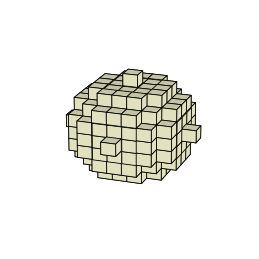

In [3]:
%%capture_png -p kernel1.png --celltype Normal --style "width:120px; height: auto"

morphball = ball(4)
plot_voxels(morphball)

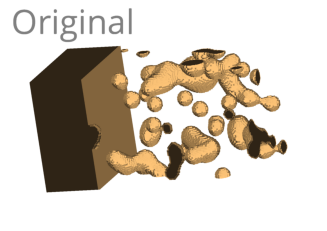

In [4]:
%%capture_png -p FirstView.png --celltype Dependend --style "width:200px"
viewer.text_overlay.visible = True
viewer.text_overlay.font_size =40
viewer.text_overlay.text = "Original"
viewer.reset_view()
viewer.layers.clear()
viewer.dims.ndisplay = 3
viewer.theme = "light"
layer1 = viewer.add_labels(blobs, name="layer1", seed=0.03)
viewer.camera.angles = (3, 21, 74)
viewer.camera.zoom = 2.8
layer1.opacity =1
make_screenshot(viewer)

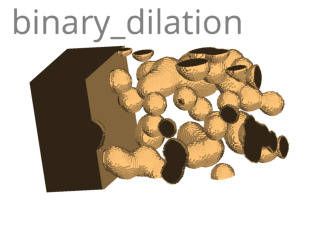

In [5]:
%%capture_png -p Dilation.png --celltype Dependend --style "width:200px"
viewer.layers.clear()
viewer.text_overlay.text = "binary_dilation"
img_morphed = scipy.ndimage.binary_dilation(blobs, morphball)
layer1 = viewer.add_labels(img_morphed, name="layer1", seed=0.03)
viewer.camera.angles = (3, 21, 74)
viewer.camera.zoom = 2.8
layer1.opacity =1
make_screenshot(viewer)

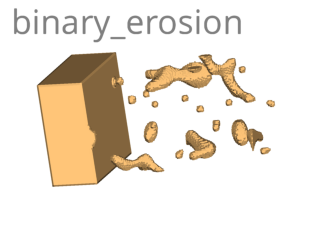

In [6]:
%%capture_png -p Erosion.png --celltype Dependend --style "width:200px"
viewer.layers.clear()
viewer.text_overlay.text = "binary_erosion"
img_morphed = scipy.ndimage.binary_erosion(blobs, morphball)

layer1 = viewer.add_labels(img_morphed, name="layer1", seed=0.03)
viewer.camera.angles = (3, 21, 74)
viewer.camera.zoom = 2.8
layer1.opacity =1
make_screenshot(viewer)

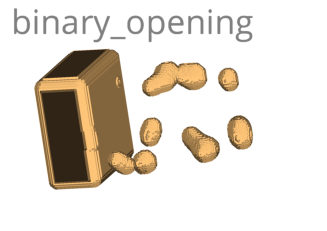

In [7]:
%%capture_png -p Dilation.png --celltype Dependend --style "width:200px"
viewer.layers.clear()
viewer.text_overlay.text = "binary_opening"
morphball = ball(8)

img_morphed = scipy.ndimage.binary_opening(blobs, morphball)
layer1 = viewer.add_labels(img_morphed, name="layer1", seed=0.03)
viewer.camera.angles = (3, 21, 74)
viewer.camera.zoom = 2.8
layer1.opacity =1
make_screenshot(viewer)

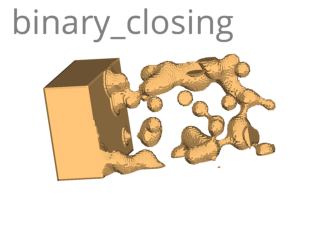

In [8]:
%%capture_png -p Dilation.png --celltype Dependend --style "width:200px"
viewer.layers.clear()
viewer.text_overlay.text = "binary_closing"

img_morphed = scipy.ndimage.binary_closing(blobs, morphball)
layer1 = viewer.add_labels(img_morphed, name="layer1", seed=0.03)
viewer.camera.angles = (3, 21, 74)
viewer.camera.zoom = 2.8
layer1.opacity =1
make_screenshot(viewer)

In [37]:
#ChapterManager.clean("Morpho")